### **Swap Gate** 
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
#### Swap gate swaps the values of the bits at each position in the input.
#### swapping bits on 2-bit string:-
$$\ket{00}  \to \ket{00}$$
$$\ket{01}  \to \ket{10}$$
$$\ket{10}  \to \ket{01}$$
$$\ket{11}  \to \ket{11}$$
<br>
<center><b>$$Swap \,Gate=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\0 & 1 & 0 & 0\\0 & 0 & 0 & 1\end{bmatrix} $$</b></center>

In [1]:
# importing dependencies
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit import BasicAer
from qiskit import execute, visualization
import matplotlib.pyplot as plt
import numpy as np

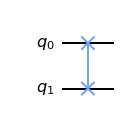

In [2]:
qc = QuantumCircuit(2)
#inbuilt function swap(a,b) swaps states of qubit a and qubit b
# here q0 and q1 get swapped
qc.swap(0,1)
qc.draw('mpl')

In [3]:
# executing the circuit
backend = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

swap_gate = backend.run(transpile(qc, backend)).result().get_unitary(qc, decimals=3)
visualization.array_to_latex(swap_gate)

<IPython.core.display.Latex object>

<left><b>Let  </b></left>

<center><b>$$ \ket{q_{1}q_{0}} = \ket{10} $$</b></center>
<center><b>$$ q_{0} \to \ket{0} $$</b></center>
<center><b>$$ q_{1} \to \ket{1} $$</b></center>
<left><b>We know </b></left>
<center><b>$$  \ket{q_{1}q_{0}}=\ket{q_{1}}\otimes\ket{q_{0}} $$</b></center>
<center><b>$$ (where  \otimes represent \, tensor\space product )$$</b></center>
<br>
<center><b>$$ \ket{q_{1}q_{0}}=\ket{10}=\ket{1} \otimes \ket{0} $$</b></center>
<br>
<center><b>$$\ket{10} =\begin{bmatrix} 0 \\ 1\end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0\end{bmatrix}$$</b></center>
<br>
<center><b>$$\ket{10} =\begin{bmatrix} 0 \\ 0\\1\\0\end{bmatrix} $$</b></center>
<br>
<center><b>$$Swap \,Gate=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\0 & 1 & 0 & 0\\0 & 0 & 0 & 1\end{bmatrix} $$</b></center>
<br>



<center><b> Now Applying Swap Gate on |10></b></center>
<br>


<center><b>$$\ket{\varphi}=Swap \,\ket{10}=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\0 & 1 & 0 & 0\\0 & 0 & 0 & 1\end{bmatrix}\begin{bmatrix} 0 \\ 0\\1\\0 \end{bmatrix} $$</b></center>
<br>

<center><b>$$\ket{\varphi}=\begin{bmatrix} 0 \\ 1\\0\\0 \end{bmatrix} $$</b></center>
<br>

<center><b>$$\ket{\varphi}=\ket{01} $$</b></center>
<br>

<center><b>Thus applying Swap gate on |10> gave |01></b></center>

In [4]:
one_zero_state = np.matrix([[0],[0],[1],[0]])
print("|10>")
display(visualization.array_to_latex(one_zero_state))

swap_gate = backend.run(transpile(qc, backend)).result().get_unitary(qc, decimals=3)
swap_gate = np.matrix(swap_gate)
print("Swap Gate")
display(visualization.array_to_latex(swap_gate))

output = swap_gate*one_zero_state
print("Applying Swap Gate gate on |10> gives to |01>, that is:")
display(visualization.array_to_latex(output))

|10>


<IPython.core.display.Latex object>

Swap Gate


<IPython.core.display.Latex object>

Applying Swap Gate gate on |10> gives to |01>, that is:


<IPython.core.display.Latex object>

### **Swap Gate could be decomposed into combination of CNOT Gates**

####  **CNOT Gate**
#### It is a conditional gate that performs ***X Gate*** on **target qubit** if **control qubit is |1>**

<br>
<center><b>$$CNOT \,Gate=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\0 & 0 & 0 & 1\\0 & 0 & 1 & 0\end{bmatrix} $$</b></center>
<br>
<br>
<left><b>we know<b><left>
<center><b>$$CNOT \,Gate=\begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix}\otimes 
\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} + \begin{bmatrix} 0 & 0 \\ 0 & 1\end{bmatrix}\otimes 
\begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix}$$</b></center>
<br>
<center><b>$$CNOT \,Gate=\ket{0}\bra{0} \otimes \, I \, + \ket{1}\bra{1} \, \otimes \, X$$</b></center>
<center><b>$$CNOT \,Gate=\begin{bmatrix} I & 0 \\ 0 & X\end{bmatrix} $$</b></center>
<br>

<left><b>Example1 : <b><left>
#### Swapping using CNOT Gate 

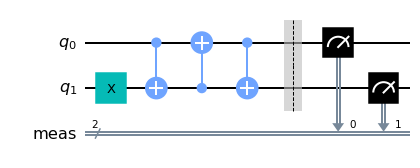

{'01': 1024}


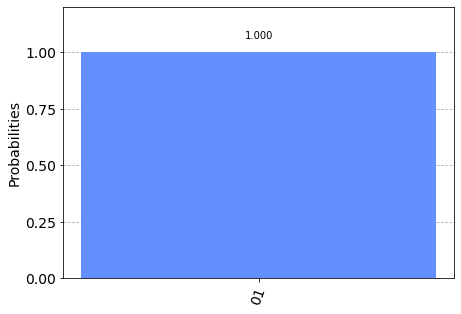

In [5]:
qc = QuantumCircuit(2)
def swap_func(q0, q1, qc):
    """
    A quantum circuit that swaps the input bits.
    01 => 10
    10 => 01
    """
    # apply x gate if q0=1, as by deafult qubits are intialised as |0> in qiskit
    if q0:
        qc.x(0)
    # apply x gate if q1=1, as by deafult qubits are intialised as |0> in qiskit
    if q1:
        qc.x(1)
    # applying the cnot gates as derived in the notes
    qc.cx(0, 1)
    qc.cx(1, 0)
    qc.cx(0, 1)
    qc.measure_all()
    display(qc.draw(output="mpl"))

# calling the function swap_func
# |10> q0 = 0  and q1 = 1
swap_func(0,1,qc)

# After swapping we get |01> 
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
#tells the number of times we get a particular output from 1024 repetitons
counts = result.get_counts(qc)
print(counts)   
#plotting the histogram
graph = visualization.plot_histogram(counts)
display(graph)   

## **Swapping n Bits**

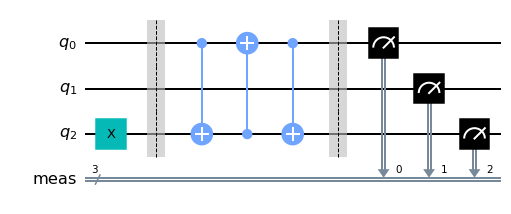

{'001': 1024}


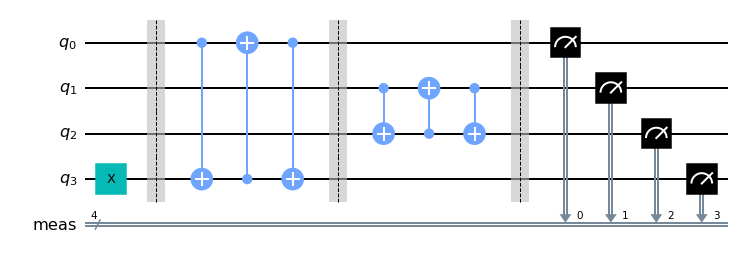

{'0001': 1024}


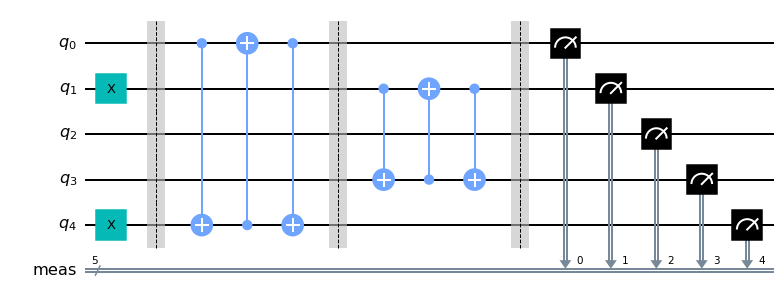

{'01001': 1024}


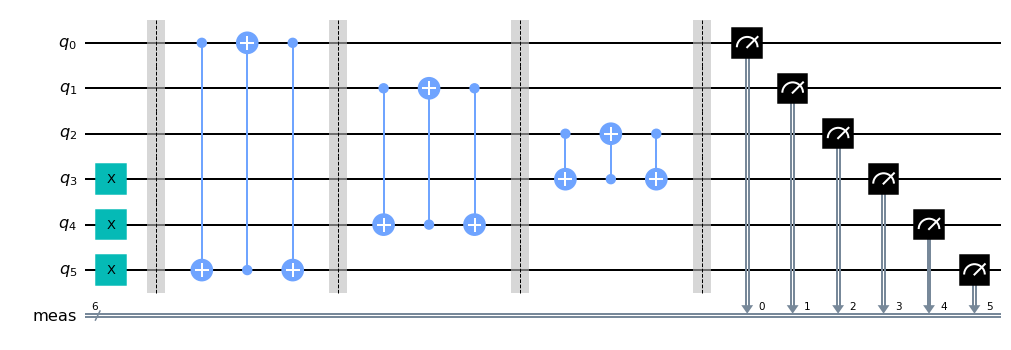

{'000111': 1024}


In [6]:
def swap_func(bits):
    """
    Swap n qubit values (right-most with left-most).
    100000 => 000001
    111000 => 000111
    100010 => 010001
    """
    n = len(bits)
    qc = QuantumCircuit(n)

    # Initialize the qubits, applying x gate wherever input of bit is 1
    for i in range(n):
        if bits[n - i - 1]:
            # the last bit in the list, 
            # is the first bit of the quantum circuit
            qc.x([i])

    # Set the left index (i) to the first bit and the right index (j) to the last bit
    i = 0
    j = n-1
    jj = n-1
    while i < j:
        qc.barrier()
        qc.cx(i, j)
        qc.cx(j, i)
        qc.cx(i, j)
        i = i + 1
        j = jj - i
    qc.measure_all()
    display(qc.draw(output="mpl"))
         
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    result = job.result()
    counts = result.get_counts(qc)
    print(counts)
    
# when swapped output is reverse of the input
swap_func([1,0,0])  
swap_func([1,0,0,0]) 
swap_func([1,0,0,1,0]) 
swap_func([1,1,1,0,0,0])

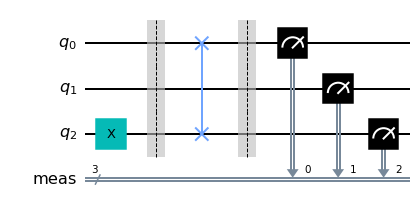

{'001': 1024}


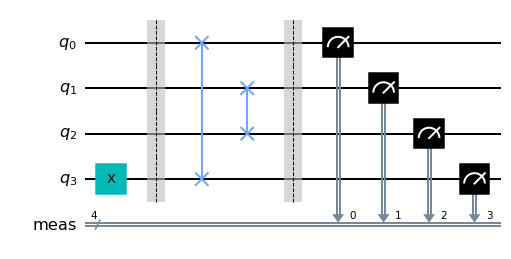

{'0001': 1024}


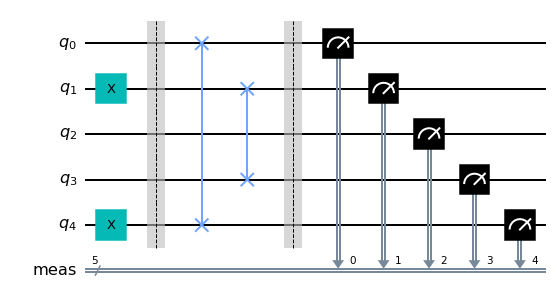

{'01001': 1024}


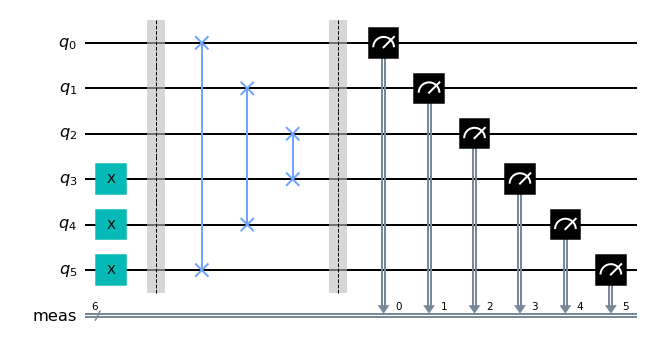

{'000111': 1024}


In [7]:
# swap gate used instead of cnot gates
def swap_func(bits):
    """
    Swap n qubit values (right-most with left-most).
    100000 => 000001
    111000 => 000111
    100010 => 010001
    """
    n = len(bits)
    qc = QuantumCircuit(n)

    # Initialize the qubits, applying x gate wherever input of bit is 1
    for i in range(n):
        if bits[n - i - 1]:
            # the last bit in the list, 
            # is the first bit of the quantum circuit
            qc.x([i])
    qc.barrier()

    # Set the left index (i) to the first bit and the right index (j) to the last bit
    i = 0
    j = n-1
    jj = n-1
    while i < j:
        qc.swap(i,j)
        i = i + 1
        j = jj - i
    qc.measure_all()
    display(qc.draw(output="mpl"))
         
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    result = job.result()
    counts = result.get_counts(qc)
    print(counts)
    
# when swapped output is reverse of the input
swap_func([1,0,0])  
swap_func([1,0,0,0]) 
swap_func([1,0,0,1,0]) 
swap_func([1,1,1,0,0,0])